In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
df = pd.read_csv("data.csv",low_memory=False)

In [4]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [5]:
columns = list(df.columns)

In [6]:
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,fico_range_low,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,4.253500e+04,4.253500e+04,42535.000000,42535.000000,42535.000000,42535.000000,4.253100e+04,42535.000000,42506.000000,42535.000000,...,0.0,0.0,0.0,0.0,41170.000000,42430.000000,0.0,0.0,0.0,0.0
mean,6.645799e+05,8.257026e+05,11089.722581,10821.585753,10139.830603,322.623063,6.913656e+04,13.373043,0.152449,713.052545,...,NaN,NaN,NaN,NaN,0.045227,0.000024,NaN,NaN,NaN,NaN
std,2.193022e+05,2.795409e+05,7410.938391,7146.914675,7131.686447,208.927216,6.409635e+04,6.726315,0.512406,36.188439,...,NaN,NaN,NaN,NaN,0.208737,0.004855,NaN,NaN,NaN,NaN
min,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,15.670000,1.896000e+03,0.000000,0.000000,610.000000,...,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN
25%,4.983925e+05,6.384795e+05,5200.000000,5000.000000,4950.000000,165.520000,4.000000e+04,8.200000,0.000000,685.000000,...,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN
50%,6.442500e+05,8.241780e+05,9700.000000,9600.000000,8500.000000,277.690000,5.900000e+04,13.470000,0.000000,710.000000,...,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN
75%,8.258225e+05,1.033946e+06,15000.000000,15000.000000,14000.000000,428.180000,8.250000e+04,18.680000,0.000000,740.000000,...,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,13.000000,825.000000,...,NaN,NaN,NaN,NaN,2.000000,1.000000,NaN,NaN,NaN,NaN


In [128]:
df_copy = df.copy()

In [7]:
for col_name in columns:
    print(col_name)

id
member_id
loan_amnt
funded_amnt
funded_amnt_inv
term
int_rate
installment
grade
sub_grade
emp_title
emp_length
home_ownership
annual_inc
verification_status
issue_d
loan_status
pymnt_plan
url
desc
purpose
title
zip_code
addr_state
dti
delinq_2yrs
earliest_cr_line
fico_range_low
fico_range_high
inq_last_6mths
mths_since_last_delinq
mths_since_last_record
open_acc
pub_rec
revol_bal
revol_util
total_acc
initial_list_status
out_prncp
out_prncp_inv
total_pymnt
total_pymnt_inv
total_rec_prncp
total_rec_int
total_rec_late_fee
recoveries
collection_recovery_fee
last_pymnt_d
last_pymnt_amnt
next_pymnt_d
last_credit_pull_d
last_fico_range_high
last_fico_range_low
collections_12_mths_ex_med
mths_since_last_major_derog
policy_code
application_type
annual_inc_joint
dti_joint
verification_status_joint
acc_now_delinq
tot_coll_amt
tot_cur_bal
open_acc_6m
open_il_6m
open_il_12m
open_il_24m
mths_since_rcnt_il
total_bal_il
il_util
open_rv_12m
open_rv_24m
max_bal_bc
all_util
total_rev_hi_lim
inq_fi
tot

In [129]:
df_copy["loan_status"].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'In Grace Period',
       'Late (31-120 days)', 'Late (16-30 days)', 'Default',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [130]:
loan_status_dict = dict()

for status in df_copy["loan_status"].unique():
    loan_status_dict[status] = len(df_copy[df_copy["loan_status"] == status])

print(loan_status_dict)



{'Fully Paid': 33586, 'Charged Off': 5653, 'Current': 513, 'In Grace Period': 16, 'Late (31-120 days)': 12, 'Late (16-30 days)': 5, 'Default': 1, 'Does not meet the credit policy. Status:Fully Paid': 1988, 'Does not meet the credit policy. Status:Charged Off': 761}


In [131]:
loan_status_dict.keys()

dict_keys(['Fully Paid', 'Charged Off', 'Current', 'In Grace Period', 'Late (31-120 days)', 'Late (16-30 days)', 'Default', 'Does not meet the credit policy. Status:Fully Paid', 'Does not meet the credit policy. Status:Charged Off'])

In [132]:
loan_status_1_df = pd.DataFrame(
    {'status': list(loan_status_dict.keys())[:3],
    'values' : list(loan_status_dict.values())[:3]}
)
loan_status_2_df = pd.DataFrame(
    {'status': list(loan_status_dict.keys())[4:6],
    'values' : list(loan_status_dict.values())[4:6]}
)
loan_status_2_df = pd.DataFrame(
    {'status': list(loan_status_dict.keys())[7:],
    'values' : list(loan_status_dict.values())[7:]}
)



[]

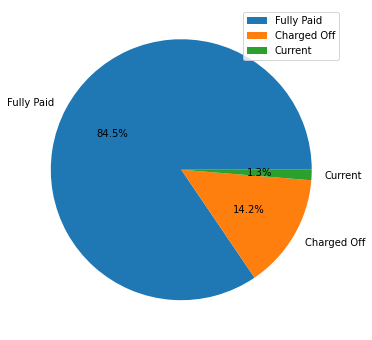

In [133]:
plt.figure(figsize=(6,6))
plt.pie(
    list(loan_status_dict.values())[:3],
    labels = list(loan_status_dict.keys())[:3],
    startangle = 0,
    autopct ='%1.1f%%'
)
plt.legend(list(loan_status_dict.keys())[:3])
plt.plot()

[]

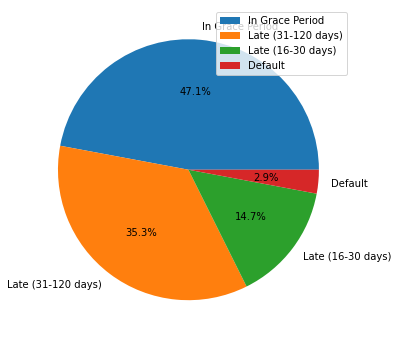

In [134]:
plt.figure(figsize=(6,6))
plt.pie(
    list(loan_status_dict.values())[3:7],
    labels = list(loan_status_dict.keys())[3:7],
    startangle = 0,
    autopct ='%1.1f%%'
)
plt.legend(list(loan_status_dict.keys())[3:7])
plt.plot()

[]

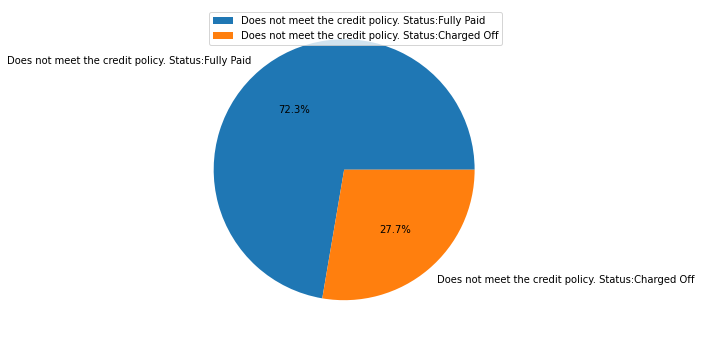

In [135]:
plt.figure(figsize=(6,6))
plt.pie(
    list(loan_status_dict.values())[7:],
    labels = list(loan_status_dict.keys())[7:],
    startangle = 0,
    autopct ='%1.1f%%'
)
plt.legend(list(loan_status_dict.keys())[7:])
plt.plot()

<AxesSubplot:xlabel='grade', ylabel='count'>

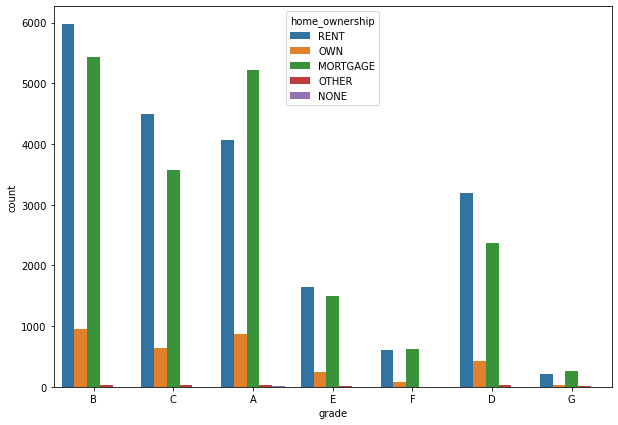

In [136]:
plt.figure(figsize=(10,7))
sns.countplot(x='grade',hue='home_ownership',data=df_copy)

In [137]:
df_copy['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [124]:
df['term'].isnull().sum() # checking any missing values

0

[]

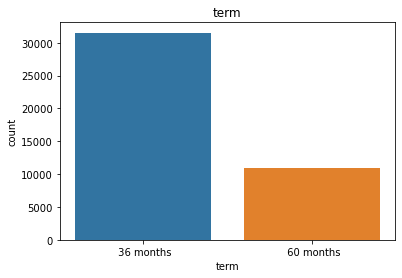

In [138]:
sns.countplot(x='term',data=df_copy)
plt.title("term")
plt.plot()

In [122]:
df['int_rate'].isnull().sum() # checking any missing values

0

In [127]:
df['int_rate']

0         10.65%
1         15.27%
2         15.96%
3         13.49%
4         12.69%
          ...   
42530     10.28%
42531      9.64%
42532      9.33%
42533      8.38%
42534      7.75%
Name: int_rate, Length: 42535, dtype: object